At 0 seconds: [-0j, -0j, -0j, -0j, -0.1j, -0.1j, -0.1j, -3j]


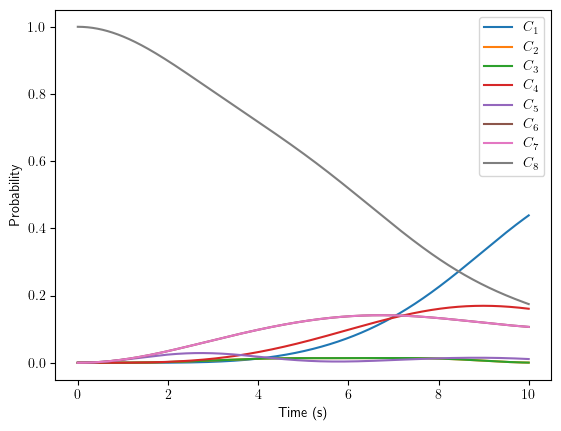

In [1]:
# from scipy.integrate import odeint
from odeintw import odeintw # Since we have complex numbers
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['text.usetex'] = True # For LaTeX labels

def odes(x, t):
    # Constants
    big_omega_1 = 1
    big_omega_2 = 1
    big_omega_3 = 1
    little_omega = 1
    g_1 = 0.1
    g_2 = 0.1
    g_3 = 0.1

    # Assign ODEs to $\vec{X}$ input vector
    c_1 = x[0]
    c_2 = x[1]
    c_3 = x[2]
    c_4 = x[3]
    c_5 = x[4]
    c_6 = x[5]
    c_7 = x[6]
    c_8 = x[7]

    # Define each ODE
    dc1dt = -1j*(3*little_omega*c_1 + np.sqrt(3)*g_1*c_2 + np.sqrt(3)*g_2*c_3 + np.sqrt(3)*g_3*c_4)
    dc2dt = -1j*(big_omega_1*c_2 + 2*little_omega*c_2 + np.sqrt(3)*g_1*c_1 + np.sqrt(2)*g_2*c_5 + np.sqrt(2)*g_3*c_6)
    dc3dt = -1j*(big_omega_2*c_3 + 2*little_omega*c_3 + np.sqrt(2)*g_1*c_5 + np.sqrt(3)*g_2*c_1 + np.sqrt(2)*g_3*c_7)
    dc4dt = -1j*(big_omega_3*c_4 + 2*little_omega*c_4 + np.sqrt(2)*g_1*c_6 + np.sqrt(2)*g_2*c_7 + np.sqrt(3)*g_3*c_1)
    dc5dt = -1j*(big_omega_1*c_5 + little_omega*c_5 + np.sqrt(2)*g_1*c_3 + np.sqrt(2)*g_2*c_2 + g_3*c_8)
    dc6dt = -1j*(big_omega_1*c_6 + big_omega_3*c_6 + little_omega*c_6 + np.sqrt(2)*g_1*c_4 + g_2*c_8 + np.sqrt(2)*g_3*c_2)
    dc7dt = -1j*(big_omega_2*c_7 + big_omega_3*c_7 + little_omega*c_7 + g_1*c_8 + np.sqrt(2)*g_2*c_4 + np.sqrt(2)*g_3*c_3)
    dc8dt = -1j*(big_omega_1*c_8 + big_omega_2*c_8 + big_omega_3*c_8 + g_1*c_7 + g_2*c_6 + g_3*c_5)

    return [dc1dt, dc2dt, dc3dt, dc4dt, dc5dt, dc6dt, dc7dt, dc8dt]

# Initial conditions
x0 = [0j, 0j, 0j, 0j, 0j, 0j, 0j, 1 + 0j] # Initial conditions must be complex numbers

# Define the time window
t = np.linspace(0, 10, 1000) # A time vector from 0s to 10s, with 1,000 time points

x = odeintw(odes, x0, t)

print("At 0 seconds: " + str(odes(x=x0,t=0)))

c_1 = x[:,0]
c_2 = x[:,1]
c_3 = x[:,2]
c_4 = x[:,3]
c_5 = x[:,4]
c_6 = x[:,5]
c_7 = x[:,6]
c_8 = x[:,7]

# Plot results
plt.plot(t, np.multiply(c_1, np.conjugate(c_1)), label="$C_{1}$")
plt.plot(t, np.multiply(c_2, np.conjugate(c_2)), label="$C_{2}$")
plt.plot(t, np.multiply(c_3, np.conjugate(c_3)), label="$C_{3}$")
plt.plot(t, np.multiply(c_4, np.conjugate(c_4)), label="$C_{4}$")
plt.plot(t, np.multiply(c_5, np.conjugate(c_5)), label="$C_{5}$")
plt.plot(t, np.multiply(c_6, np.conjugate(c_6)), label="$C_{6}$")
plt.plot(t, np.multiply(c_7, np.conjugate(c_7)), label="$C_{7}$")
plt.plot(t, np.multiply(c_8, np.conjugate(c_8)), label="$C_{8}$")
plt.legend(loc="upper right")
plt.xlabel("Time (s)")
plt.ylabel("Probability")
plt.show()